(6000, 7)


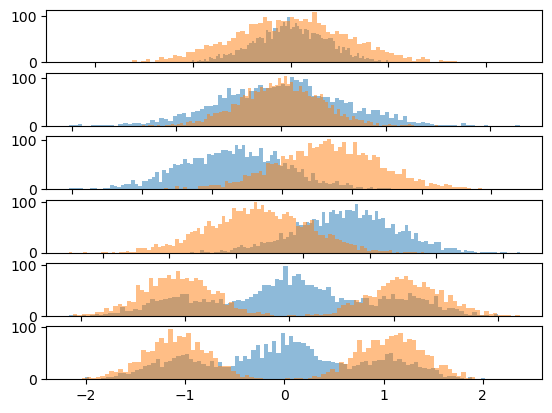

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn.datasets
from sklearn.metrics import classification_report

trainData = np.genfromtxt('./trainDataDigits.txt', delimiter=',')
print(trainData.shape)

D = np.array(trainData[:,0:trainData.shape[1]-1], dtype="float64").T
L = np.array(trainData[:,trainData.shape[1]-1], dtype="float64")

fix, axs = plt.subplots(6)
for i in range(0, 6):
    axs[i].hist(D[i, (L == 0)], bins=100, alpha=0.5)
    axs[i].hist(D[i, (L == 1)], bins=100, alpha=0.5)
plt.show()

(6, 2990) (6,)
[[-3.]]
(100, 1, 1)
(6, 2990) (6,)
[[-3.]]
(100, 1, 1)
(6, 2990) (6,)
[[-3.]]
(100, 1, 1)
(6, 2990) (6,)
[[-3.]]
(100, 1, 1)
(6, 2990) (6,)
[[-3.]]
(100, 1, 1)
(6, 2990) (6,)
[[-3.]]
(100, 1, 1)


<Figure size 640x480 with 0 Axes>

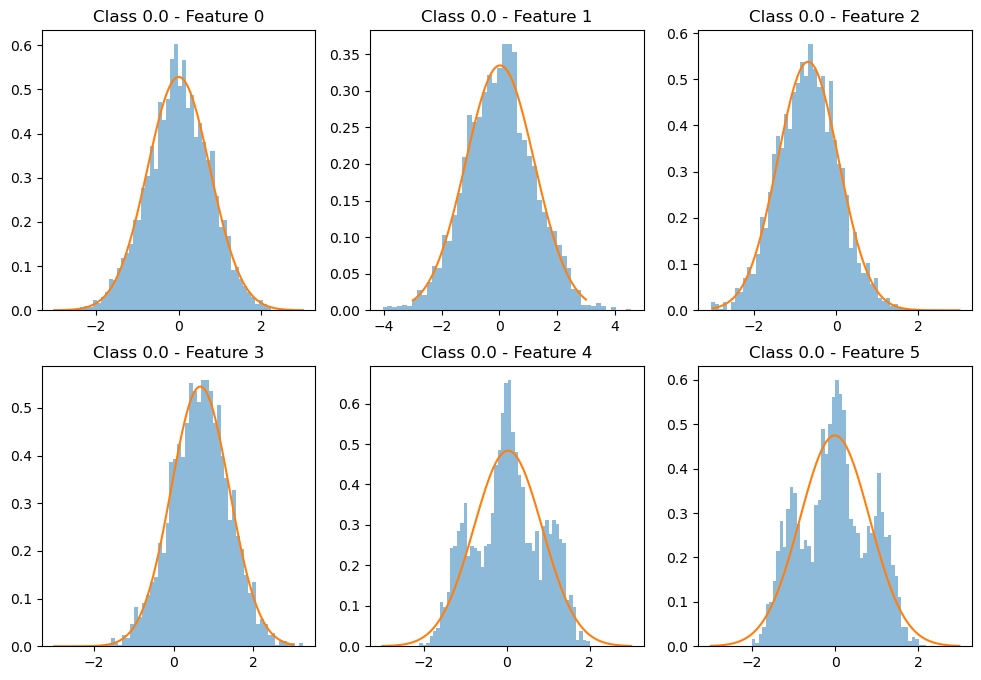

(6, 3010) (6,)
[[-3.]]
(100, 1, 1)
(6, 3010) (6,)
[[-3.]]
(100, 1, 1)
(6, 3010) (6,)
[[-3.]]
(100, 1, 1)
(6, 3010) (6,)
[[-3.]]
(100, 1, 1)
(6, 3010) (6,)
[[-3.]]
(100, 1, 1)
(6, 3010) (6,)
[[-3.]]
(100, 1, 1)


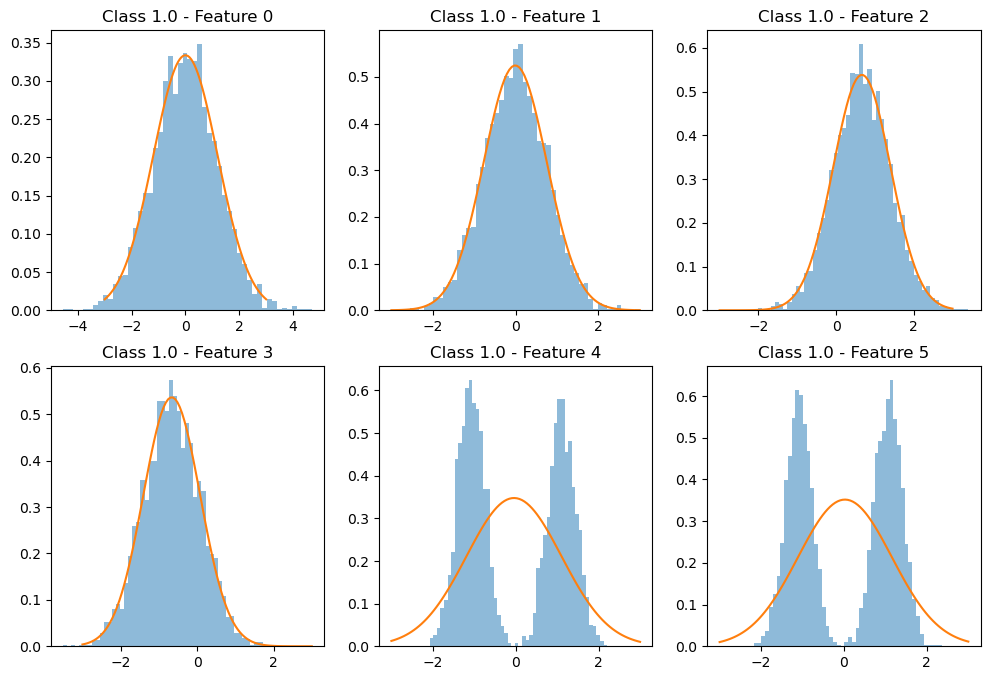

In [2]:


def vcol(x):
    return x.reshape(-1, 1)
def vrow(x):
    return x.reshape(1, -1)
def logpdf_GAU_ND_singleSample(X, mu, C):

    _, C_logdet = np.linalg.slogdet(C)
    C_inv = np.linalg.inv(C)
    dotp = 0.5 * (X - mu).T @ C_inv @ (X - mu)

    return -C.shape[0]/2 * np.log(2*np.pi) - 0.5 * C_logdet - dotp

def logpdf_GAU_ND(X, mu, C):
    """
    Calculates the log of the probability density function of a multivariate Gaussian distribution.
    """
    print(X[:, 0:0+1])
    ll = [logpdf_GAU_ND_singleSample(X[:, i:i+1], mu, C) for i in range(X.shape[1])]
    print(np.array(ll).shape)
    return np.array(ll).ravel()

plt.figure()

for l in np.unique(L):
    D_l = D[:, (L == l)]
    m = np.mean(D_l, axis=1)

    fig, axs = plt.subplots(2, 3)
    fig.set_size_inches(12, 8)
    for i in range(0, D_l.shape[0]):
        print(D_l.shape, m.shape)
        z = D_l[i, :] - m[i]
        C = z @ z.T / D_l.shape[1]

        m_i = np.ones((1,1)) * m[i]
        C_i = np.ones((1,1)) * C
        x = np.linspace(-3, 3, 100)
        pdf = np.exp(logpdf_GAU_ND(vrow(x.ravel()), m_i, C_i))
        axs[i//3, i%3].set_title(f"Class {l} - Feature {i}")
        axs[i//3, i%3].hist(D_l[i, :], bins=50, alpha=0.5, density=True)
        axs[i//3, i%3].plot(x, pdf)
    plt.show()
